# example

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
df = pd.read_csv(train_url)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.shape

(891, 12)

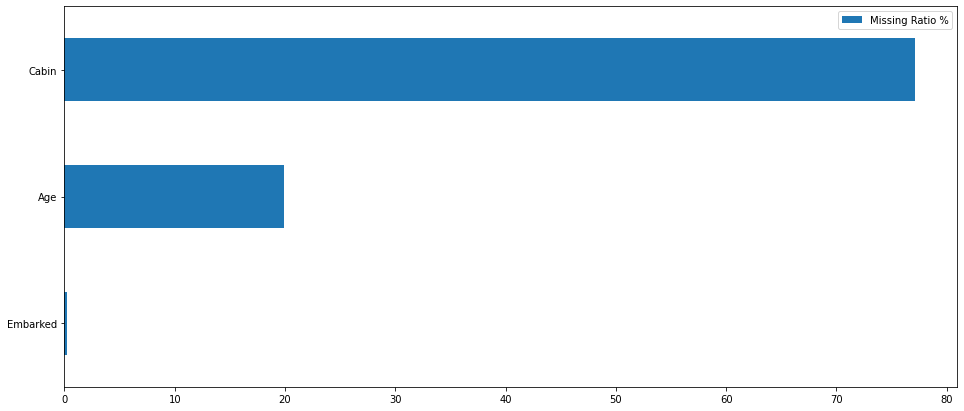

Columns without Nan:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare']


In [21]:
# nulls check
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=True)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        fig, ax = plt.subplots(figsize=(16, 7))
        missing_data.plot(kind = "barh", ax=ax);
        plt.show();
        print("Columns without Nan: ", list(df.columns[~df.isnull().any()]))
    else:
        print('No NAs found')
plot_nas(df)

In [22]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [3]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [5]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [26]:
for i in df.columns.drop('name'):
    print (i)
    print (df[i].value_counts())

survived
0    549
1    342
Name: survived, dtype: int64
pclass
3    491
1    216
2    184
Name: pclass, dtype: int64
sex
male      577
female    314
Name: sex, dtype: int64
age
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64
sibsp
0    608
1    209
2     28
4     18
3     16
8   

In [36]:
df.isnull().sum().sort_values(ascending=False)

cabin       687
age         177
embarked      2
fare          0
ticket        0
parch         0
sibsp         0
sex           0
name          0
pclass        0
survived      0
dtype: int64

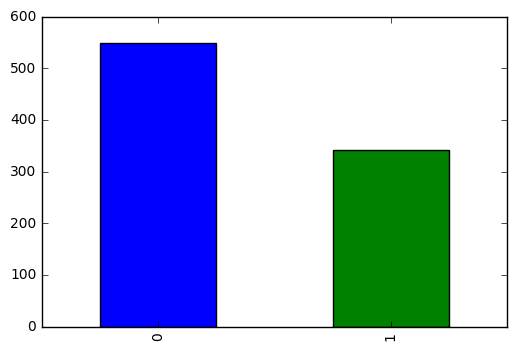

In [37]:
df.survived.value_counts().plot.bar()
plt.show()

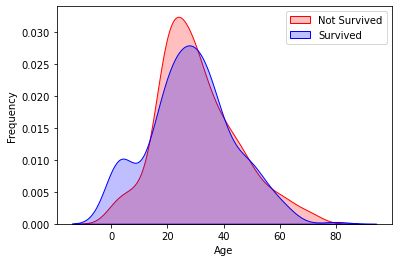

In [15]:
# Explore Age distibution 
g = sns.kdeplot(df["Age"][(df["Survived"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["Survived"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

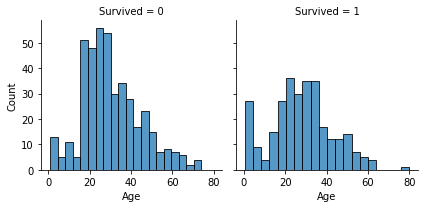

In [14]:
g = sns.FacetGrid(df, col='Survived')
g = g.map(sns.histplot, "Age", bins=20)

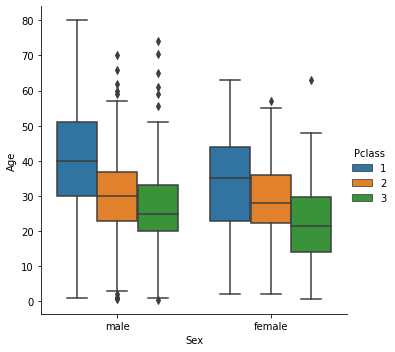

In [17]:
g = sns.catplot(y="Age",x="Sex",hue="Pclass", data=df,kind="box")

In [9]:
for dataset in [df]:
    dataset['Title'] = dataset["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title2'] = dataset['Title'].replace(
        ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
         'Rare')

    dataset['Title2'] = dataset['Title2'].replace('Mlle', 'Miss')
    dataset['Title2'] = dataset['Title2'].replace('Ms', 'Miss')
    dataset['Title2'] = dataset['Title2'].replace('Mme', 'Mrs')
    
df[['Title2', 'Survived']].groupby(['Title2'], as_index=False).mean()

,Title2,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


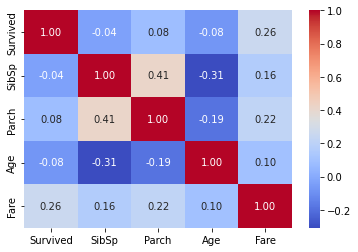

In [10]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [43]:
lm = LogisticRegression()
rf = RandomForestRegressor()

In [48]:
df["Age_categories"] = pd.cut(df["age"],[-1,0,5,12,18,35,60,100],labels=["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"])

In [50]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["pclass","sex","Age_categories"]:
    df = create_dummies(df,column)

In [51]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,pclass_3,sex_female,sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,1,0,1,0,0,0,0,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,1,0,0,0,0,0,0,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,1,1,0,0,0,0,0,1,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,1,0,0,0,0,0,1,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,1,0,1,0,0,0,0,1,0,0


In [55]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'Age_categories', 'pclass_1', 'pclass_2',
       'pclass_3', 'sex_female', 'sex_male', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior'],
      dtype='object')

In [56]:
lr = LogisticRegression()
lr.fit(df[['pclass_1', 'pclass_2',
       'pclass_3', 'sex_female', 'sex_male', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior']], df["survived"])

C:\Users\Xarly\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(lr.predict(df[['pclass_1', 'pclass_2',
       'pclass_3', 'sex_female', 'sex_male', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior']]), df['survived'])


In [59]:
accuracy

0.8080808080808081